In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten

Datensatz importieren

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/daten/main/statistik/01-1-child-heart-survival-x.csv')

Datenüberblick

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hospital           13 non-null     object 
 1   Operations         13 non-null     int64  
 2   Survivors          13 non-null     int64  
 3   Deaths             13 non-null     int64  
 4   ThirtyDaySurvival  13 non-null     float64
 5   PercentageDying    13 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 752.0+ bytes


In [4]:
df.head()

,Hospital,Operations,Survivors,Deaths,ThirtyDaySurvival,PercentageDying
0,London - Harley Street,418,413,5,98.8,1.2
1,Leicester,607,593,14,97.7,2.3
2,Newcastle,668,653,15,97.8,2.2
3,Glasgow,760,733,27,96.3,3.7
4,Southampton,829,815,14,98.3,1.7


In [5]:
df.tail()

,Hospital,Operations,Survivors,Deaths,ThirtyDaySurvival,PercentageDying
8,London - Brompton,1094,1075,19,98.3,1.7
9,Liverpool,1132,1112,20,98.2,1.8
10,London - Evelina,1220,1185,35,97.1,2.9
11,Birmingham,1457,1421,36,97.5,2.5
12,London - Great Ormond Street,1892,1873,19,99.0,1.0


Datenformat anpassen

In [ ]:
df["Hospital"] = df["Hospital"].astype("category")

# Analyse

In [8]:
df.describe()

,Operations,Survivors,Deaths,ThirtyDaySurvival,PercentageDying
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,994.846154,974.615385,20.230769,97.915385,2.084615
std,387.085659,382.254832,8.671350,0.709279,0.709279
min,418.000000,413.000000,5.000000,96.300000,1.000000
25%,760.000000,733.000000,14.000000,97.700000,1.700000
50%,983.000000,960.000000,19.000000,97.900000,2.100000
75%,1132.000000,1112.000000,23.000000,98.300000,2.300000
max,1892.000000,1873.000000,36.000000,99.000000,3.700000


Daten sortieren (für die folgenden Analysen)

In [15]:
df = df.sort_values("ThirtyDaySurvival", ascending=False)

In [27]:
df

,Hospital,Operations,Survivors,Deaths,ThirtyDaySurvival,PercentageDying,Percentage
12,London - Great Ormond Street,1892,1873,19,99.0,1.0,14.629243
0,London - Harley Street,418,413,5,98.8,1.2,3.232042
4,Southampton,829,815,14,98.3,1.7,6.409959
5,Bristol,835,821,14,98.3,1.7,6.456352
8,London - Brompton,1094,1075,19,98.3,1.7,8.458981
9,Liverpool,1132,1112,20,98.2,1.8,8.752803
7,Leeds,1038,1016,22,97.9,2.1,8.025980
2,Newcastle,668,653,15,97.8,2.2,5.165082
1,Leicester,607,593,14,97.7,2.3,4.693420
6,Dublin,983,960,23,97.7,2.3,7.600711


## Balkendiagramm

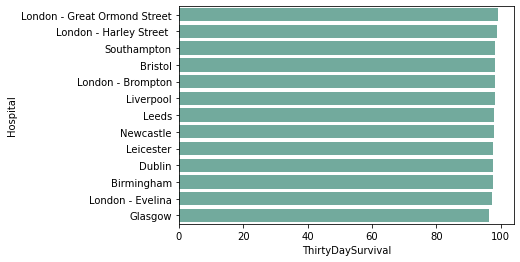

In [20]:
sns.barplot(
    data=df, 
    x="ThirtyDaySurvival", 
    y="Hospital", 
    color='#69b3a2');

Anpassung der x-Achse:

[(86.0, 100.0)]

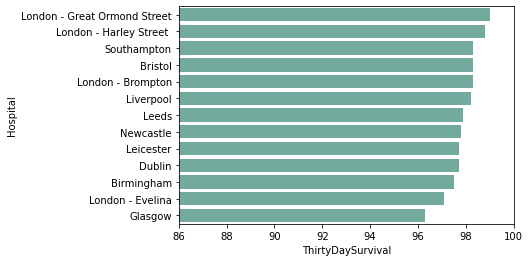

In [22]:
g = sns.barplot(
    data=df,
    x="ThirtyDaySurvival", 
    y="Hospital", 
    color='#69b3a2')

g.set(xlim=(86, 100)) 

Erzeugung einer neuen Variable: Prozentualer Anteil aller Operationen pro Krankenhaus

In [24]:
df["Percentage"] = df["Operations"] / df["Operations"].sum() * 100

In [30]:
df = df.round(2)

In [35]:
df.sort_values("Percentage", ascending = True, inplace=True)

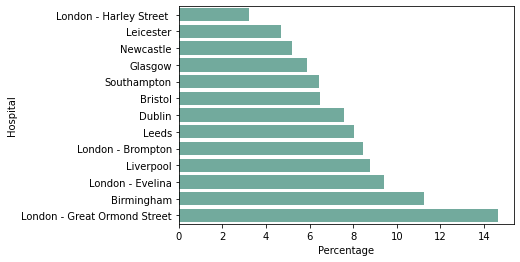

In [36]:
sns.barplot(
    data=df, 
    x="Percentage", 
    y="Hospital", 
    color='#69b3a2');